# Customer Segmentation

## Question 1: Load
18 attributes of customers' credit card usage was pulled to determine clusters in the customers based on their spending behaviours.
Programmatically download and load into your favorite analytical tool the transactions data. 
Please describe the structure of the data. Number of records and fields in each record?
Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

## Question 2: Plot
Plot a histogram of each processed account.
Report any structure you find and any hypotheses you have about that structure.

## Question 3: Data Wrangling
Deep dive into the data.
Report anything you found. 

## Question 4: Model
We are going to use classification method to classify two multiple-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Credit Card Default Detection Case where you will classify two multiple-feature groups.

## answer for Q1

## answer for Q2

## answer for Q3

## answer for Q4

**Metadata:** <br>
**CUSTID**: identification of credit card holder (nominal) <br>
**BALANCE**: balance amount left in their account to make purchases <br>
**BALANCE_FREQUENCY**: how frequently the balance is updated (0 is not frequently, 1 is frequently) <br>
**PURCHASES**: amount of purchases made from account <br>
**ONEOFF_PURCHASES**: maximum purchases amount done in one-go <br>
**INSTALLMENTS_PURCHASES**: amount of purchases done in installment <br>
**CASH_ADVANCE**: cash in advance given by the use <br>
**PURCHASES_FREQUENCY**: how frequently purchases are being made (0 is not frequently, 1 is frequently) <br>
**ONEOFF_PURCHASES_FREQUENCY**: how frequently the purchases are happening in one-go (0 is not frequently, 1 is frequently) <br>
**PURCHASES_INSTALLMENTS_FREQUENCY**: how frequently purchases in installments are being done (0 is not frequently, 1 is frequently) <br>
**CASH_ADVANCE_FREQUENCY**: how frequently the cash in advance being paid <br>
**CASH_ADVANCE_TRX**: number of transaction made with "cash in advanced" <br>
**PURCHASES_TRX**: number of purchase transaction made <br>
**CREDIT_LIMIT**: limit of credit card for user <br>
**PAYMENTS**: amount of payment done by year <br>
**MINIMUM_PAYMENTS**: mini amount of payments made by year <br>
**PRC_FULL_PAYMENT**: percent of full payment paid by user <br>
**TENURE**: tenure of credit card service for user <br>

## 1. Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"data/raw/CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [7]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)

## 2. Plot

In [8]:
for col in df.columns:
    print(df[col].value_counts())

C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: BALANCE, Length: 8871, dtype: int64
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.250000       8
0.100000

Text(0, 0.5, 'Count')

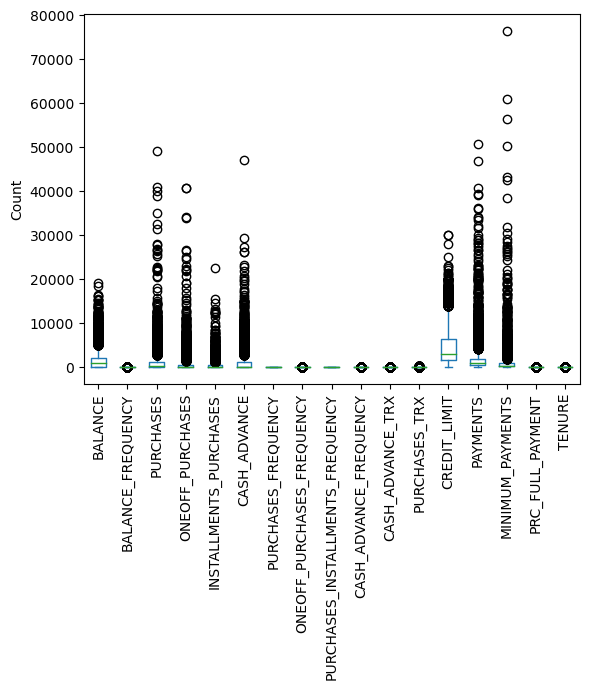

In [9]:
df.plot(kind="box")
plt.xticks(rotation=90)
plt.ylabel("Count")

There are quite a number of outliers as seen in the above plot, but for now we shall just assume they are valid and leave them be.

Keep looking at the data:

<AxesSubplot:>

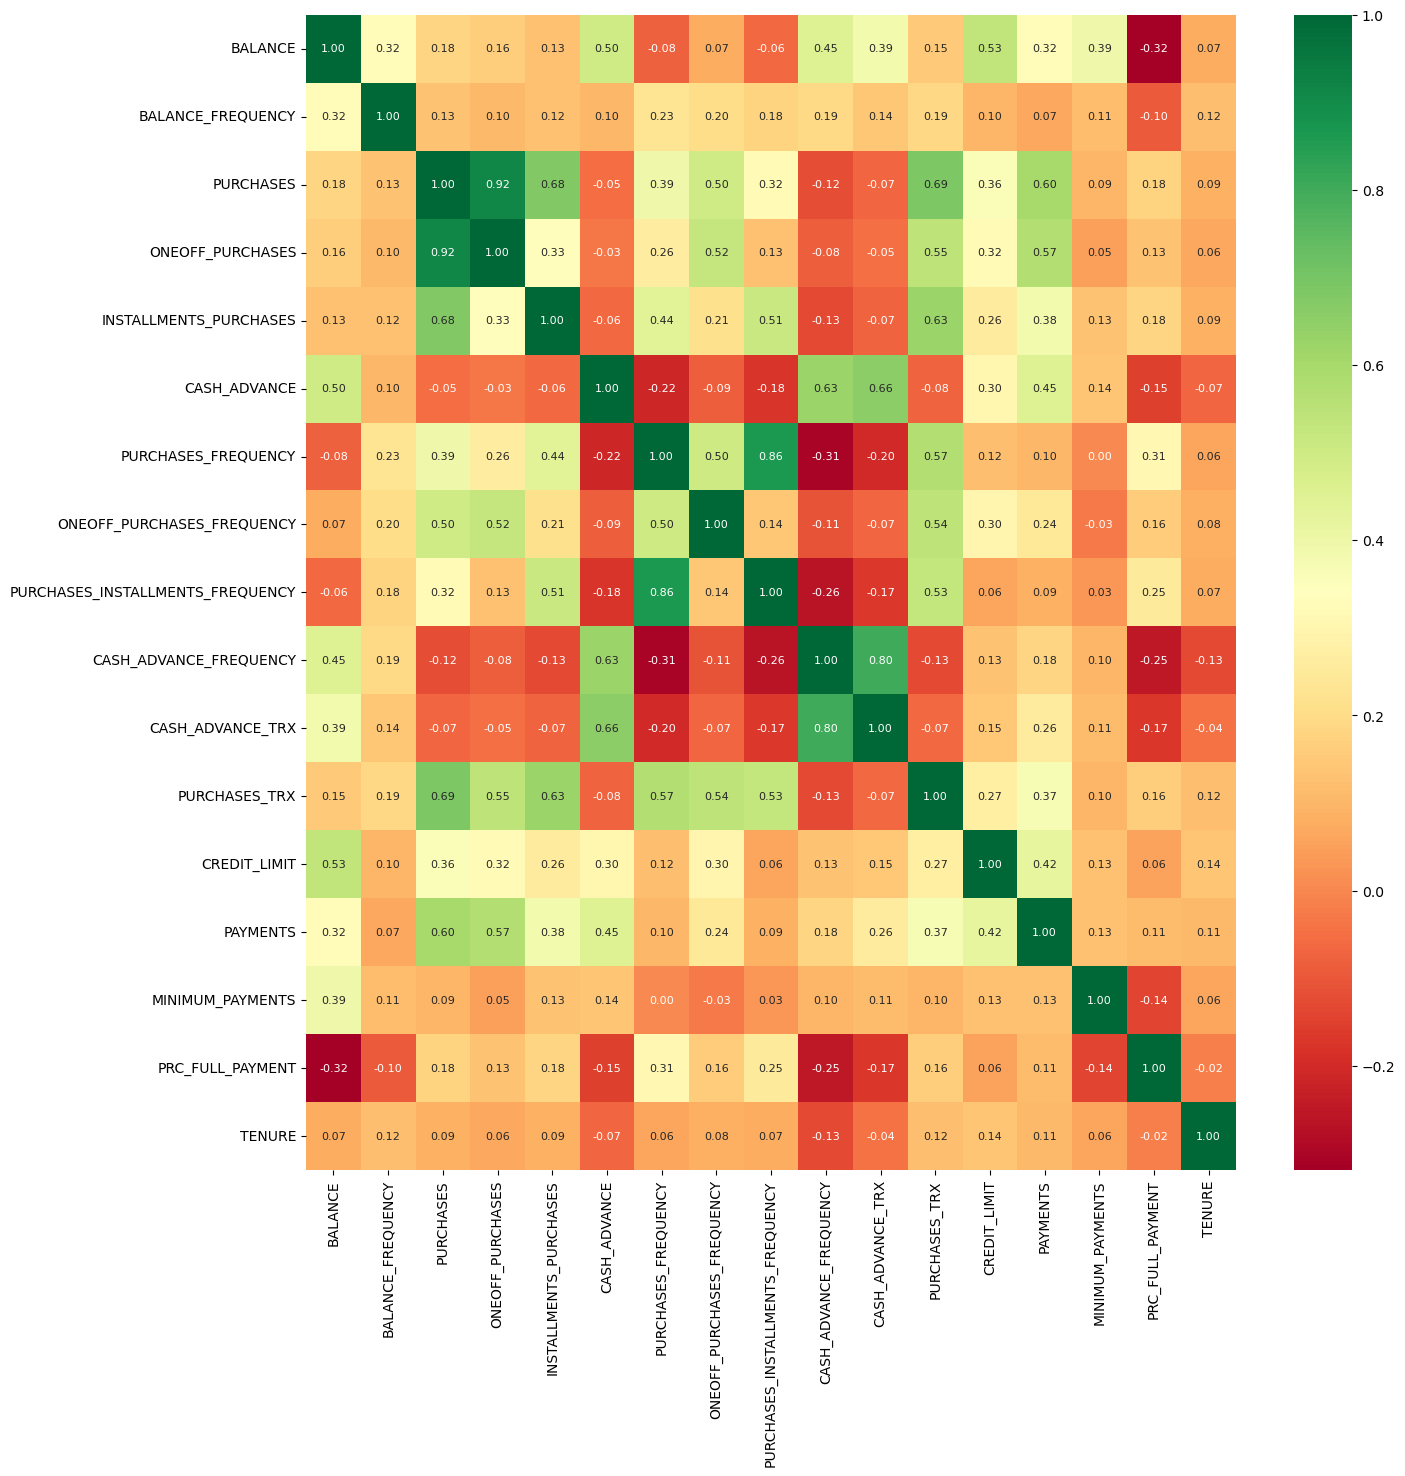

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(data=df.corr(),cmap = "RdYlGn", annot = True, annot_kws={"fontsize":8}, fmt=".2f")

* Very strong correlation (0.92) between PURCHASES and ONEOFF_PURCHASES (the amount of purchases made and the maximum purchase amount in one-go)
* Strong positive correlation (0.86) between PURCHASES_FREQUENCY and PURCHASESINSTALLMENTS_FREQUENCY (how frequently purchases are being made and how frequently purchases are made in installments)
* 0.8 correlation between CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX (how frequently the cash in advance is being paid and the number of transactions made with "Cash in Advanced")
* Negative correlation (-0.32) between BALANCE and PRC_FULL_PAYMENT (the balance in the account and the percentage of full payment paid back)
* -0.31 correlation between CASH_ADVANCE_FREQUENCY and PURCHASES_FREQUENCY (how frequently the cash in advance is being paid and how frequently purchases are being made)

# 3. Data Wrangling

In [11]:
df_clean=df.drop(['CUST_ID'],axis=1)
df_clean.drop(['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY',
               'CASH_ADVANCE_FREQUENCY','PURCHASES_TRX','CASH_ADVANCE_TRX'],axis=1,inplace=True)
df_clean.drop(['TENURE','PRC_FULL_PAYMENT','BALANCE_FREQUENCY'],axis=1,inplace=True)

Scale the data to ensure certain attributes (i.e. columns) do not give a higher weighting than others:

In [12]:
from sklearn.preprocessing import StandardScaler
df_scaled=df_clean.copy()
std = StandardScaler()
df_scaled = std.fit_transform(df_scaled)

# 4. Model

When using KMeans to cluster, we need to know the number of clusters to train the model on. But how do we know the optimal number of clusters?

Try graphing the inertia of varying number of clusters and using the elbow method to determine the optimal number of clusters.

Inertia is the sum of squared distances within the cluster - ideally the smallest, even 0, inertia is best as it demonstrates how coherent and tight the cluster is.

Text(0, 0.5, 'Inertia')

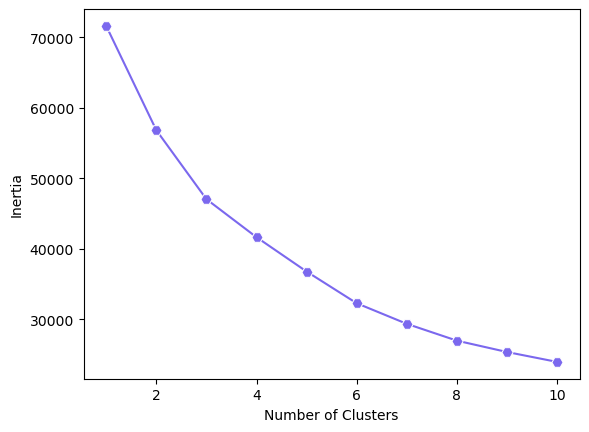

In [13]:
from sklearn.cluster import KMeans
kinertia=[]

for i in range(1,11):
    kmodel=KMeans(n_clusters=i)
    kmodel.fit(df_scaled)
    kinertia.append(kmodel.inertia_)

inertia_df=pd.DataFrame({"no_k":list(range(1,11)),"inertia":kinertia})

sns.lineplot(x=inertia_df["no_k"],y=inertia_df["inertia"],color="mediumslateblue",marker="H",markersize=8,markeredgecolor="w",legend=False)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

Hmm, it's not so clear from the above graph how many clusters would be optimal. So try graphing the silhoutte coefficient.

Silhouette coefficient measures how close each point in a cluster is to the points in its neighbouring clusters, where the coefficient can range from -1 to +1:
* +1 indicates that a point is far from the neighbouring cluster and close to it's assigned cluster
* -1 indicates that a point is close to its neighbouring cluster and far from it's assigned cluster
* 0 indicates that a point is at the boundary of the distance between the two clusters.

Thus a +1 value is best as it demonstrates a clear boundary of clusters.

Text(0, 0.5, 'Silhouette Score')

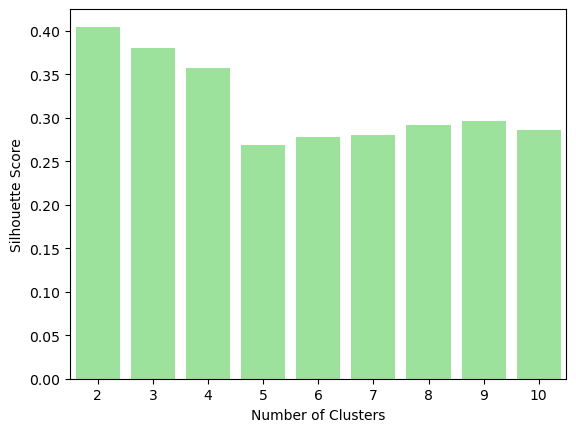

In [14]:
from sklearn.metrics import silhouette_score
ksilhouette=[]

for j in range(2,11):
    kmodel=KMeans(n_clusters=j)
    kpredict=kmodel.fit_predict(df_scaled)
    kscores=silhouette_score(df_scaled,kpredict)
    ksilhouette.append(kscores)

silhouette_df=pd.DataFrame({"no_k":list(range(2,11)),"silhoutte":ksilhouette})

sns.barplot(x=silhouette_df["no_k"],y=silhouette_df["silhoutte"],color="lightgreen")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

The number of clusters should be 4!

In [15]:
model=KMeans(n_clusters=4)
model.fit(df_scaled)
labels=model.labels_

View the clusters:

In [16]:
df["CLUSTER"]=labels
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [17]:
cluster_df=df.groupby("CLUSTER").mean().T
cluster_df

CLUSTER,0,1,2,3
BALANCE,845.756922,1486.967542,5296.112031,5094.618018
BALANCE_FREQUENCY,0.834670,0.965983,0.961898,0.945368
PURCHASES,411.070425,2540.613665,619.722326,13079.142857
ONEOFF_PURCHASES,162.149590,1722.398105,308.449899,9209.378762
INSTALLMENTS_PURCHASES,249.245832,818.584940,311.333736,3869.973619
CASH_ADVANCE,515.316940,358.129420,4248.006076,3838.095773
PURCHASES_FREQUENCY,0.400618,0.891896,0.300131,0.873579
ONEOFF_PURCHASES_FREQUENCY,0.071155,0.679184,0.106989,0.716092
PURCHASES_INSTALLMENTS_FREQUENCY,0.328586,0.551535,0.227424,0.705898
CASH_ADVANCE_FREQUENCY,0.110348,0.068347,0.374013,0.184632


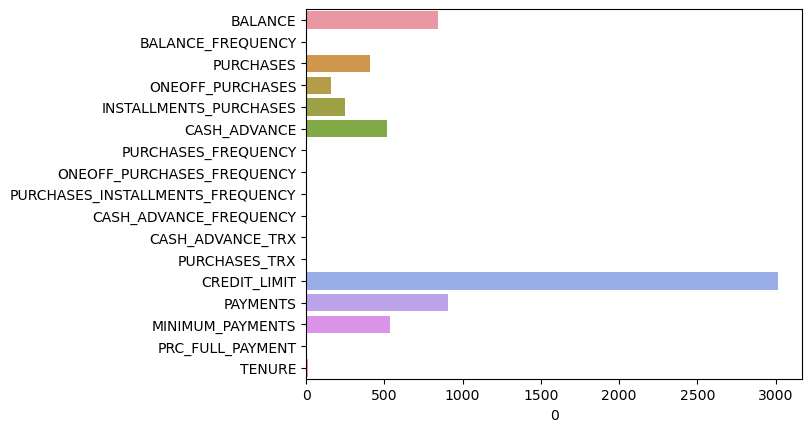

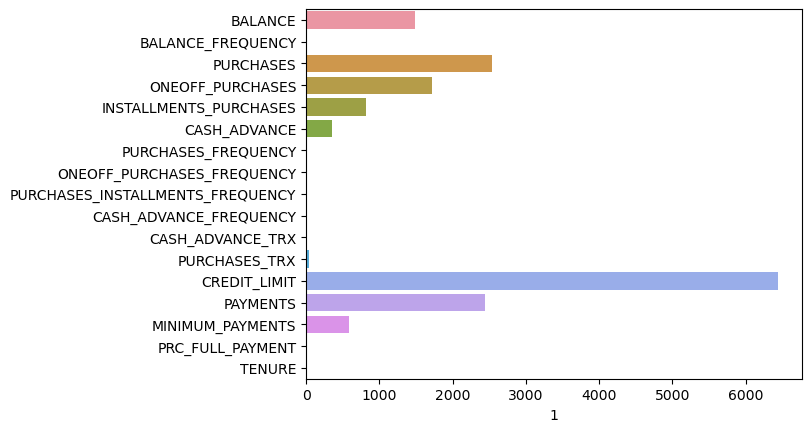

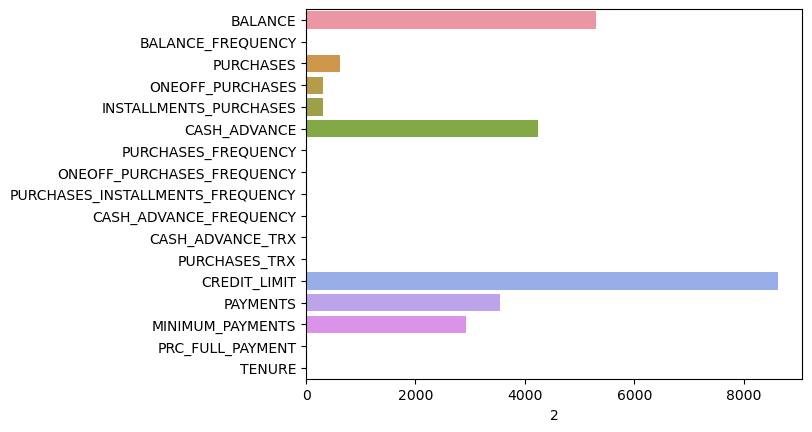

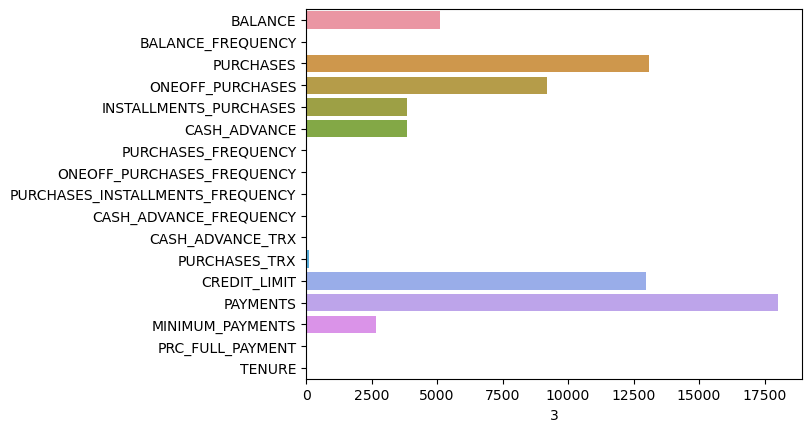

In [18]:
for i in range(0,4):
    sns.barplot(x=cluster_df[i],y=cluster_df.index)
    #plt.xlim(-0.5,1.5)
    plt.show()

Cluster 0
* Purchase frequently with their own account is much lower than cash in advance
* Balance is topped up fairly often, and about half of the credit card charges are paid back

Cluster 1
* Purchases more with their own account than with cash in advance, and purchases are in installments rather than as one-offs
* Lower credit card limit, and balance is not topped up as often

Cluster 2
* Almost all purchases done with their own account with more one-off purchases than installments
* High credit limit, and balance is frequently topped up



Reduce the dimensionality from 17 to 2 to visualise the data:

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df=pca.fit_transform(df_clean)

x=pca_df[:,0]
y=pca_df[:,1]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

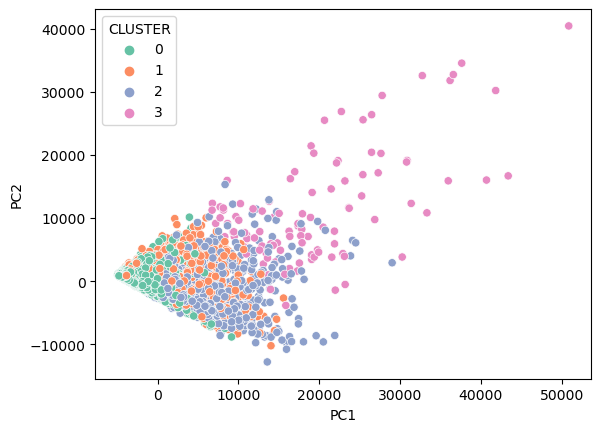

In [20]:
pc=pd.DataFrame({"PC1":x,"PC2":y,"CLUSTER":labels})
sns.scatterplot(x=pc["PC1"],y=pc["PC2"],hue=pc["CLUSTER"],palette="Set2")